In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

AGRI_WOH = '../data/agri_woh.csv'

# 1 Data Cleaning

In [2]:
woh = pd.read_csv(AGRI_WOH)
woh.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [3]:
woh.head(2)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,SURVEY,2019,YEAR,NaN,COUNTY,NEW YORK,36,EASTERN,60,SCHOHARIE,...,NaN,NaN,0,NaN,OATS,OATS - ACRES HARVESTED,TOTAL,NOT SPECIFIED,300,NaN
1,SURVEY,2019,YEAR,NaN,COUNTY,NEW YORK,36,EASTERN,60,SCHOHARIE,...,NaN,NaN,0,NaN,OATS,OATS - ACRES PLANTED,TOTAL,NOT SPECIFIED,500,NaN


In [4]:
# drop columns with just one value
num_unique = woh.apply(pd.Series.nunique, axis=0)
cols_to_drop = num_unique[num_unique==1].index
woh.drop(columns=cols_to_drop, inplace=True)
woh.columns

Index(['Year', 'Week Ending', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'Watershed', 'Commodity',
       'Data Item', 'Value', 'CV (%)'],
      dtype='object')

In [5]:
# drop columns with all null values
col_is_null = woh.isnull().all()
cols_to_drop = col_is_null[col_is_null].index
woh.drop(columns=cols_to_drop, inplace=True)
woh.columns

Index(['Year', 'Ag District', 'Ag District Code', 'County', 'County ANSI',
       'Commodity', 'Data Item', 'Value'],
      dtype='object')

In [6]:
# drop redundant columns
cols_to_drop = ['Ag District Code', 'County ANSI']
woh.drop(columns=cols_to_drop, inplace=True)
woh.columns

Index(['Year', 'Ag District', 'County', 'Commodity', 'Data Item', 'Value'], dtype='object')

In [22]:
# transform 'Value' from string to proper integers
woh['Value'] = woh.Value.str.replace('[^0-9]', '')\
                            .replace('', np.nan)\
                            .fillna(0)\
                            .astype('float', errors='ignore')

In [23]:
woh = woh.sort_values(['County', 'Year']).reset_index(drop=True)
woh.head()

,Year,Ag District,County,Commodity,Data Item,Value
0,1996,SOUTHEAST,DELAWARE,CATTLE,"CATTLE, COWS, MILK - INVENTORY, AVG, MEASURED ...",17500.0
1,1996,SOUTHEAST,DELAWARE,CORN,CORN - ACRES PLANTED,9300.0
2,1996,SOUTHEAST,DELAWARE,CORN,"CORN, GRAIN - ACRES HARVESTED",900.0
3,1996,SOUTHEAST,DELAWARE,CORN,"CORN, GRAIN - PRODUCTION, MEASURED IN BU",94600.0
4,1996,SOUTHEAST,DELAWARE,CORN,"CORN, GRAIN - YIELD, MEASURED IN BU / ACRE",105.0


# 2 Descriptive Summary

In [10]:
# the county and its agricultural district
woh[['Ag District', 'County']].drop_duplicates().sort_values('County')

,Ag District,County
0,SOUTHEAST,DELAWARE
394,SOUTHEAST,GREENE
701,EASTERN,SCHOHARIE
1118,SOUTHEAST,SULLIVAN
1412,SOUTHEAST,ULSTER


In [12]:
# unique commodities
woh.Commodity.unique()

array(['CATTLE', 'CORN', 'HAY', 'MILK', 'OATS', 'SOYBEANS', 'RENT',
       'WHEAT'], dtype=object)

In [14]:
# all available data on commodities
woh['Data Item'].unique()

array(['CATTLE, COWS, MILK - INVENTORY, AVG, MEASURED IN HEAD',
       'CORN - ACRES PLANTED', 'CORN, GRAIN - ACRES HARVESTED',
       'CORN, GRAIN - PRODUCTION, MEASURED IN BU',
       'CORN, GRAIN - YIELD, MEASURED IN BU / ACRE',
       'CORN, SILAGE - ACRES HARVESTED',
       'CORN, SILAGE - PRODUCTION, MEASURED IN TONS',
       'CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE',
       'HAY - ACRES HARVESTED', 'HAY - PRODUCTION, MEASURED IN TONS',
       'HAY - YIELD, MEASURED IN TONS / ACRE',
       'HAY, (EXCL ALFALFA) - ACRES HARVESTED',
       'HAY, (EXCL ALFALFA) - PRODUCTION, MEASURED IN TONS',
       'HAY, (EXCL ALFALFA) - YIELD, MEASURED IN TONS / ACRE',
       'HAY, ALFALFA - ACRES HARVESTED',
       'HAY, ALFALFA - PRODUCTION, MEASURED IN TONS',
       'HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE',
       'MILK - PRODUCTION, MEASURED IN LB',
       'MILK - PRODUCTION, MEASURED IN LB / HEAD',
       'OATS - ACRES HARVESTED', 'OATS - ACRES PLANTED',
       'OATS - PRODUCTION

# 3 Viz: Yield

In [8]:
# data items we are interested in for measuring productivity
woh[woh['Data Item'].str.contains('YIELD')]['Data Item'].unique()

# BU = bushels (64 pints of dry goods)

array(['CORN, GRAIN - YIELD, MEASURED IN BU / ACRE',
       'CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE',
       'HAY - YIELD, MEASURED IN TONS / ACRE',
       'HAY, (EXCL ALFALFA) - YIELD, MEASURED IN TONS / ACRE',
       'HAY, ALFALFA - YIELD, MEASURED IN TONS / ACRE',
       'OATS - YIELD, MEASURED IN BU / ACRE',
       'SOYBEANS - YIELD, MEASURED IN BU / ACRE',
       'WHEAT - YIELD, MEASURED IN BU / ACRE',
       'WHEAT, WINTER - YIELD, MEASURED IN BU / ACRE'], dtype=object)

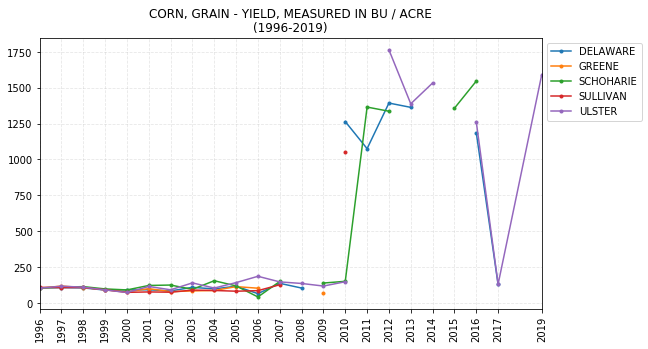

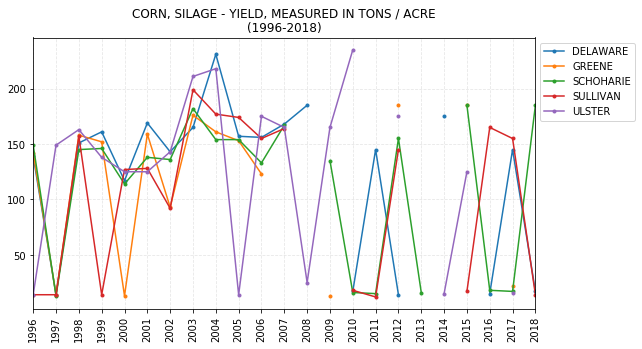

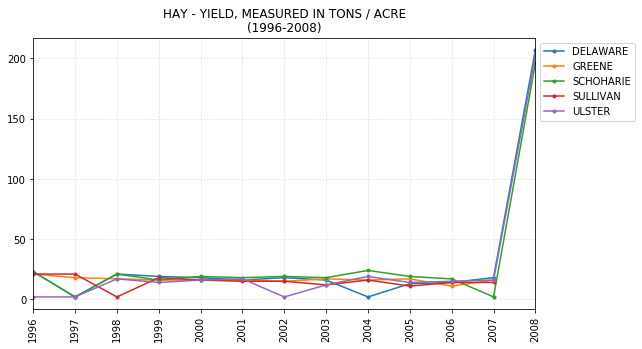

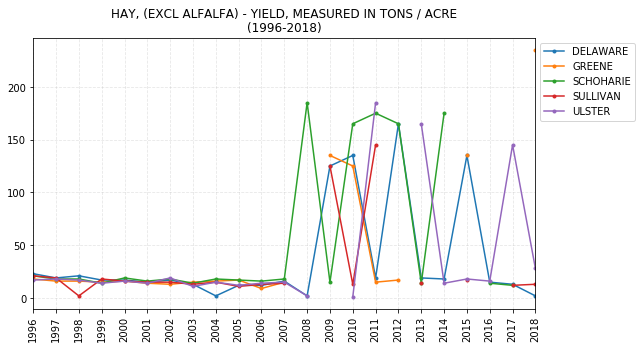

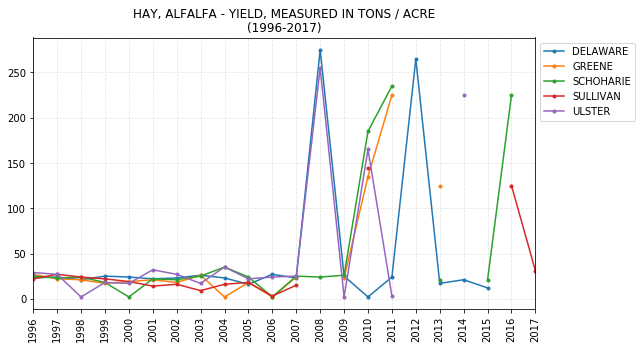

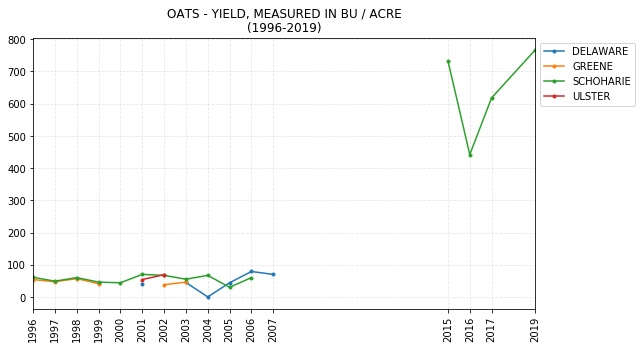

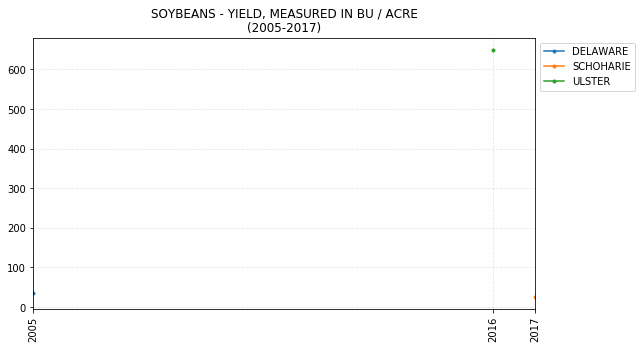

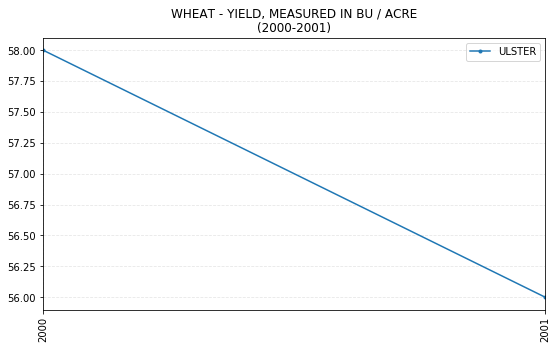

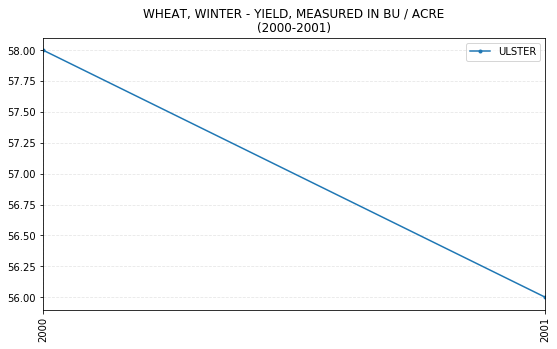

In [25]:
data_items = woh[woh['Data Item'].str.contains('YIELD')]['Data Item'].unique()

for data_item in data_items:
    subset_woh = woh[woh['Data Item']==data_item]
    subset_woh = subset_woh.pivot(index='Year', columns='County', values='Value')
    subset_woh.index = subset_woh.index.astype('int')
    
    subset_woh.plot.line(marker='.', figsize=(9,5))
    plt.xticks(subset_woh.index, rotation=90)
    plt.xlabel('')

    plt.legend(bbox_to_anchor=(1,1))
    min_year = subset_woh.index.min()
    max_year = subset_woh.index.max()
    plt.title("%s\n(%d-%d)"%(data_item, min_year, max_year))
    plt.grid(linestyle='--', alpha=.3)
    
# analysis
# seems like only corn and hay data is available

# 4 Viz: Combined Yield

In [26]:
yields_in_tons = ['CORN, SILAGE - YIELD, MEASURED IN TONS / ACRE',
                  'HAY - YIELD, MEASURED IN TONS / ACRE']
yields_in_bu = ['CORN, GRAIN - YIELD, MEASURED IN BU / ACRE',
                'OATS - YIELD, MEASURED IN BU / ACRE',
                'SOYBEANS - YIELD, MEASURED IN BU / ACRE',
                'WHEAT - YIELD, MEASURED IN BU / ACRE']

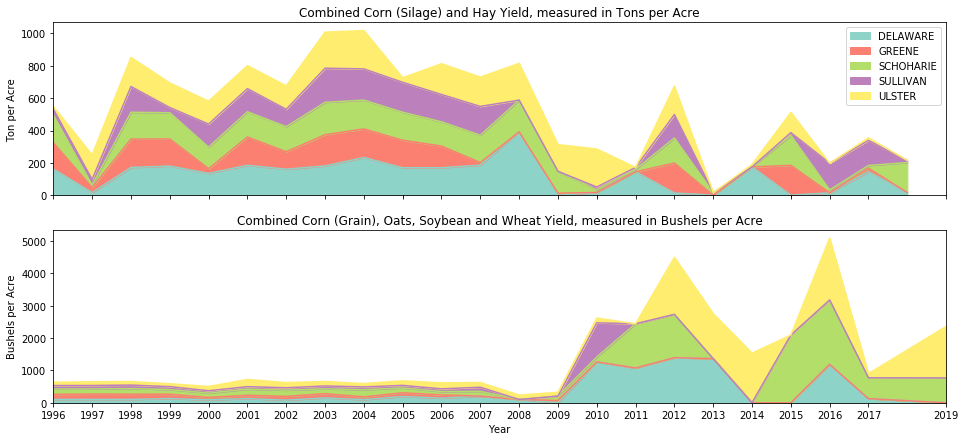

In [71]:
_, axes = plt.subplots(2, sharex=True)
ylabels = ['Ton per Acre', 'Bushels per Acre']
titles = ['Combined Corn (Silage) and Hay Yield, measured in Tons per Acre',
          'Combined Corn (Grain), Oats, Soybean and Wheat Yield, measured in Bushels per Acre']
for i, cat in enumerate([yields_in_tons, yields_in_bu]):
    subset_df = woh[woh['Data Item'].isin(cat)]\
        .pivot_table(index='Year', columns='County', values='Value', aggfunc='sum')
    subset_df.plot.area(figsize=(16, 7),
                        ax=axes[i],
                        cmap='Set3',
                        legend=True if i==0 else False,
                        stacked=True)
    
    axes[i].set_ylabel(ylabels[i])
    axes[i].set_xticks(subset_df.index)
    axes[i].set_title(titles[i])

axes[0].legend(bbox_to_anchor=(1,1))
